# Article - The numerical solution of systems of stiff ordinary differential equations



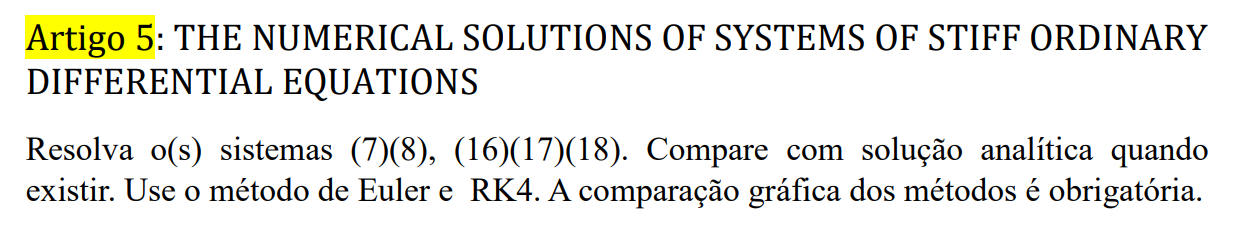

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Métodos Euler e Runge-Kutta

In [2]:
#Método de Euler
def euler(t, y0, h):
    n = len(t)
    y = np.zeros((n, 2))
    y[0] = y0
    for i in range(n - 1):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return y

#Método de Runge-Kutta de quarta ordem
def runge_kutta(t, y0, h, n):
#     n = len(t)
    y = np.zeros((n, 2))
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

### System (7)

In [3]:
def f(t, y):
    dxdt = 1195*y[0] - 1995*y[1]
    dydt = 1197*y[0]- 1997*y[1]
    
    return np.array([dxdt, dydt])

def analytic(t,y):
  xt = 10*np.exp(-2*t) - 8*np.exp(-800*t)
  yt = 6*np.exp(-2*t) - 8*np.exp(-800*t)

  return xt, yt

a=0
b=1
dom = 400
h = 0.001 #passo 
# h =  (b - a)/dom

t = np.arange(a, dom, h)
n = len(t)
y0 = (2, -2)

#Chamando as funções
euler_result = euler(t, y0, h)
runge_kutta_result = runge_kutta(t, y0, h, n)
analitic1, analitic2 = analytic(t,y0)

In [4]:
# Dataframe e Gráfico System 7
Sys7_df = pd.DataFrame.from_dict({
    'Tempo': t,
    'Euler_dXdt': euler_result[:, 0],
    'Euler_dYdt': euler_result[:, 1],
    'RungerK_dXdt': runge_kutta_result[:, 0],
    'RungerK_dYdt': runge_kutta_result[:, 1],
    'Analitic_dXdt': analitic1,
    'Analitic_dYdt': analitic2,
}, orient = 'index')

Sys7_df = Sys7_df.transpose()
# results_df.to_csv('resultados.csv', index=False)
Sys7_df

,Tempo,Euler_dXdt,Euler_dYdt,RungerK_dXdt,RungerK_dYdt,Analitic_dXdt,Analitic_dYdt
0,0.000,2.000000e+00,-2.000000e+00,2.000000e+00,-2.000000e+00,2.000000,-2.000000
1,0.001,8.380000e+00,4.388000e+00,6.366153e+00,2.374145e+00,6.385388,2.393380
2,0.002,9.640040e+00,5.656024e+00,8.327576e+00,4.343544e+00,8.344908,4.360876
3,0.003,9.876120e+00,5.900072e+00,9.202723e+00,5.226651e+00,9.214436,5.238364
4,0.004,9.907440e+00,5.939344e+00,9.587185e+00,5.619058e+00,9.594222,5.626094
...,...,...,...,...,...,...,...
399995,399.995,3.181783e-321,1.907093e-321,5.153105e-321,3.087910e-321,0.000000,0.000000
399996,399.996,3.181783e-321,1.907093e-321,5.153105e-321,3.087910e-321,0.000000,0.000000
399997,399.997,3.181783e-321,1.907093e-321,5.153105e-321,3.087910e-321,0.000000,0.000000
399998,399.998,3.181783e-321,1.907093e-321,5.153105e-321,3.087910e-321,0.000000,0.000000


In [5]:
sys = Sys7_df[Sys7_df['Tempo'].isin([0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])]
sys

,Tempo,Euler_dXdt,Euler_dYdt,RungerK_dXdt,RungerK_dYdt,Analitic_dXdt,Analitic_dYdt
0,0.0,2.000000,-2.000000,2.000000,-2.000000,2.000000,-2.000000
100,0.1,8.185668,4.911401,8.187308,4.912385,8.187308,4.912385
200,0.2,6.700516,4.020310,6.703200,4.021920,6.703200,4.021920
300,0.3,5.484820,3.290892,5.488116,3.292870,5.488116,3.292870
400,0.4,4.489692,2.693815,4.493290,2.695974,4.493290,2.695974
600,0.6,3.008325,1.804995,3.011942,1.807165,3.011942,1.807165
800,0.8,2.015733,1.209440,2.018965,1.211379,2.018965,1.211379


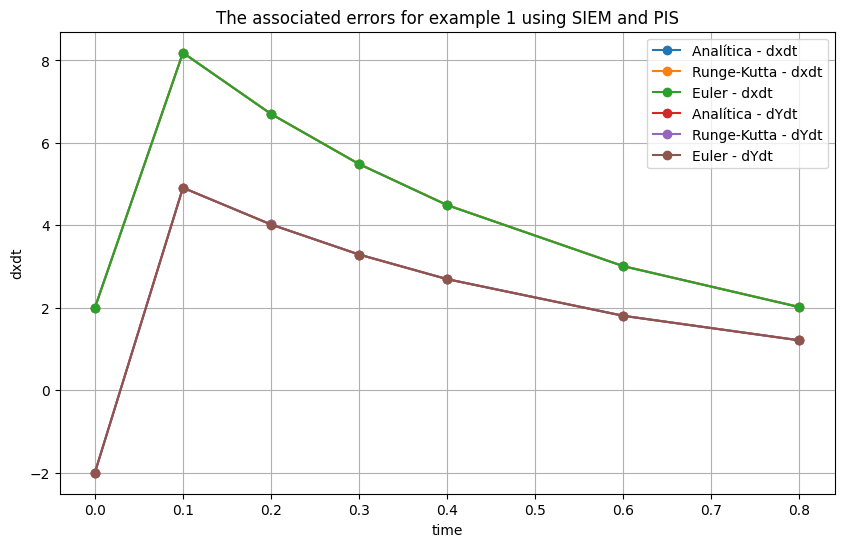

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(sys['Tempo'], sys['Analitic_dXdt'], label='Analítica - dxdt', marker='o')
plt.plot(sys['Tempo'], sys['RungerK_dXdt'], label='Runge-Kutta - dxdt', marker='o')
plt.plot(sys['Tempo'], sys['Euler_dXdt'], label='Euler - dxdt', marker='o')

plt.plot(sys['Tempo'], sys['Analitic_dYdt'], label='Analítica - dYdt', marker='o')
plt.plot(sys['Tempo'], sys['RungerK_dYdt'], label='Runge-Kutta - dYdt', marker='o')
plt.plot(sys['Tempo'], sys['Euler_dYdt'], label='Euler - dYdt', marker='o')


plt.xlabel('time')
plt.ylabel('dxdt')
plt.legend()
plt.grid(True)
plt.title('The associated errors for example 1 using SIEM and PIS')
plt.show()

## System 16, 17, 18

In [7]:
#Método de Euler
def euler(t, y0, h):
    n = len(t)
    y = np.zeros((n, 3))
    y[0] = y0
    for i in range(n - 1):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return y

#Método de Runge-Kutta de quarta ordem
def runge_kutta(t, y0, h, n):
#     n = len(t)
    y = np.zeros((n, 3))
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

In [8]:
def f(t, y):
    dxdt = 10*y[1] - 10*y[0]
    dydt = 28*y[0]- y[1] - y[0]*y[2]
    dzdt = y[0]*y[1] - ((8*y[2])/3)
    return np.array([dxdt, dydt, dzdt])

#Condições iniciais
a=0
b=1
dom = 400
h = 0.001 #passo 
# h =  (b - a)/dom

t = np.arange(a, dom, h)
n = len(t)
y0 = (1, 2, 2)

#Chamando as funções
euler_result = euler(t, y0, h)
runge_kutta_result = runge_kutta(t, y0, h, n)

In [9]:
# Dataframe e Gráfico System 16,17,18
Sys16_df = pd.DataFrame.from_dict({
    'Tempo': t,
    'Euler_dXdt': euler_result[:, 0],
    'Euler_dYdt': euler_result[:, 1],
    'RungerK_dXdt': runge_kutta_result[:, 0],
    'RungerK_dYdt': runge_kutta_result[:, 1]
}, orient = 'index')

Sys16_df = Sys16_df.transpose()
# results_df.to_csv('resultados.csv', index=False)
Sys16_df

,Tempo,Euler_dXdt,Euler_dYdt,RungerK_dXdt,RungerK_dYdt
0,0.000,1.000000,2.000000,1.000000,2.000000
1,0.001,1.010000,2.024000,1.010070,2.024120
2,0.002,1.020140,2.048239,1.020281,2.048483
3,0.003,1.030421,2.072722,1.030635,2.073092
4,0.004,1.040844,2.097450,1.041131,2.097951
...,...,...,...,...,...
399995,399.995,-4.282471,2.426135,-10.748460,-1.788102
399996,399.996,-4.215384,2.435327,-10.658764,-1.680276
399997,399.997,-4.148877,2.443938,-10.568897,-1.574327
399998,399.998,-4.082949,2.451984,-10.478880,-1.470253


In [10]:
sys16 = Sys16_df[Sys16_df['Tempo'].isin([0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])]
sys16

,Tempo,Euler_dXdt,Euler_dYdt,RungerK_dXdt,RungerK_dYdt
0,0.0,1.000000,2.000000,1.000000,2.000000
100,0.1,2.951431,6.253248,2.969907,6.291311
200,0.2,8.752155,17.748886,8.841670,17.893840
300,0.3,18.777258,24.546317,18.736704,24.120499
400,0.4,11.275134,-4.841458,11.137138,-4.440239
600,0.6,-5.656504,-8.136620,-5.251193,-7.791756
800,0.8,-9.012246,-10.271985,-9.118020,-10.770547


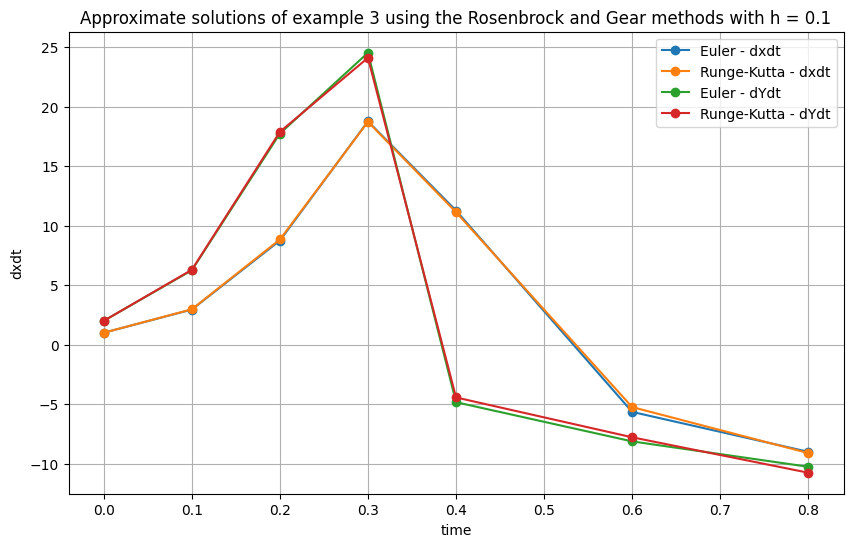

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(sys16['Tempo'], sys16['Euler_dXdt'], label='Euler - dxdt', marker='o')
plt.plot(sys16['Tempo'], sys16['RungerK_dXdt'], label='Runge-Kutta - dxdt', marker='o')

plt.plot(sys16['Tempo'], sys16['Euler_dYdt'], label='Euler - dYdt', marker='o')
plt.plot(sys16['Tempo'], sys16['RungerK_dYdt'], label='Runge-Kutta - dYdt', marker='o')

plt.xlabel('time')
plt.ylabel('dxdt')
plt.legend()
plt.grid(True)
plt.title('Approximate solutions of example 3 using the Rosenbrock and Gear methods with h = 0.1')
plt.show()